In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define a function to load and process images from a specified folder
def load_images_from_folder(folder):
    # Initialize an empty list to store the images
    images = []

    # Loop through all files in the specified folder
    for filename in os.listdir(folder):
        # Construct the full path to the image file
        img = cv2.imread(os.path.join(folder,filename))

        # Check if the image was loaded successfully
        if img is not None:
            # Convert the image from RGB to BGR color format (OpenCV uses BGR by default)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            # Resize the image to a fixed size (512x512)
            img = cv2.resize(img, (512, 512))
            # Append the processed image to the list of images
            images.append(img)

    # Return the list of loaded and processed images
    return images

1002


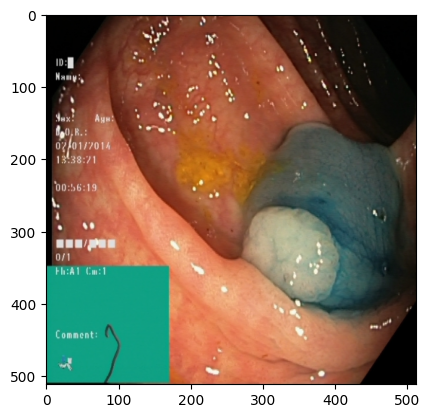

In [3]:
# Define the folder path (make sure the path is correct for your system)
folder_path_dyed_lifted_polyps = r"C:\Users\User\OneDrive - Univerzitet u Novom Sadu\Desktop\HyperKvasir\hyper-kvasir-dataset-reorganized\dyed-lifted-polyps"

# Call the function to load images from the specified folder
images = load_images_from_folder(folder_path_dyed_lifted_polyps)

# Print the number of images loaded into the 'images' list
print(images.__len__())

# primer
plt.imshow(images[0])

In [7]:
# Select the first image from the list 'images' and store it in 'test_image'
test_image = images[0]

# Print the shape of the 'test_image' (height, width, channels)
print("Shape of the 'test_image' (height, width, channels): ", test_image.shape)

# Print the pixel value at position (365, 200) in the image
# The ":" indicates that we're retrieving the value of all color channels (RGB/BGR depending on your system)
print("Print the pixel value at position (365, 200) in the image: ",test_image[365, 200, :])

# Retrieve the pixel value at position (450, 50)
# This pixel value is likely related to a potential green patch 
# PROVERA da li postoji potencijalne green patches: From i=360 to i=532, j=0 to j=205 
green_mark_pixel = test_image[450, 50, :]
print("PROVERA da li postoji potencijalne green patches: ", green_mark_pixel)

Shape of the 'test_image' (height, width, channels):  (512, 512, 3)
Print the pixel value at position (365, 200) in the image:  [239 150 114]
PROVERA da li postoji potencijalne green patches:  [ 27 154 129]


[35 21 14]


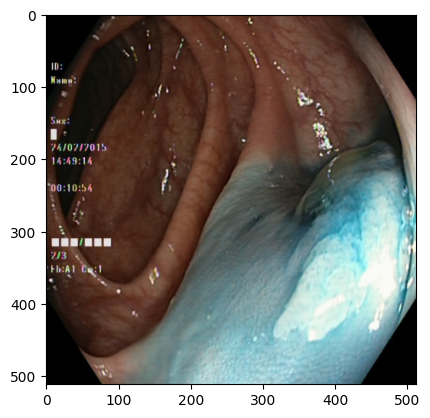

In [ ]:
plt.imshow(images[1])

# Retrieve the pixel value at position (450, 50)
# This pixel value is likely related to a potential green patch 
# PROVERA da li postoji potencijalne green patches
print(images[1][450, 50, :])

In [11]:
# Create a function to detect green patches

def detect_green_patches(image):
    green_mark_pixel = image[450, 50, :]
    if green_mark_pixel[1] > 150:
        return True
    else:
        return False

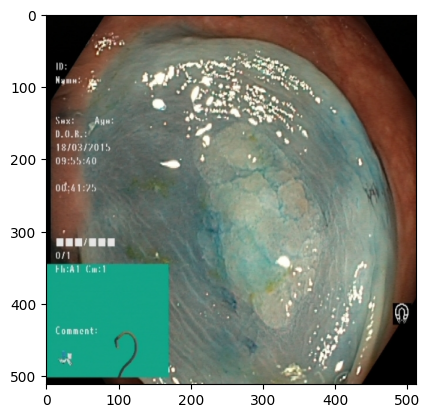

In [12]:
plt.imshow(images[30])

In [12]:
for index, image in enumerate(images):
    if detect_green_patches(image):
        print(f"Green patch detected in image {index}")
    else:
        print(f"No green patch detected in image {index}")

Green patch detected in image 0
No green patch detected in image 1
Green patch detected in image 2
No green patch detected in image 3
Green patch detected in image 4
No green patch detected in image 5
Green patch detected in image 6
Green patch detected in image 7
Green patch detected in image 8
Green patch detected in image 9
Green patch detected in image 10
Green patch detected in image 11
No green patch detected in image 12
Green patch detected in image 13
No green patch detected in image 14
Green patch detected in image 15
No green patch detected in image 16
Green patch detected in image 17
No green patch detected in image 18
No green patch detected in image 19
Green patch detected in image 20
No green patch detected in image 21
No green patch detected in image 22
No green patch detected in image 23
Green patch detected in image 24
Green patch detected in image 25
Green patch detected in image 26
Green patch detected in image 27
Green patch detected in image 28
No green patch detec

In [13]:
# Create a function to eliminate green patches from images if the image contain a green patche

def eliminate_green_patches(image):

     # Create a copy of the original image to avoid modifying the original one
    new_image = image.copy()

    # Check if the image contains any green patches (ova funkcija je definisana gore)
    if detect_green_patches(image):
        # Create a full black mask of the same size as the image
        mask = np.zeros(image.shape, np.uint8)
        # Draw a white rectangle on the mask (this is the region we want to keep, assuming it’s not green)
        rect = cv2.rectangle(mask, (0, image.shape[1] - 0), (170, image.shape[1] - 170), (255, 255, 255), -1)
        # We want to delete the green patche, so we need to invert the mask (green patch region becomes black, non-green becomes white)
        rect = cv2.bitwise_not(rect)

        # Apply the mask to the image
        # Apply the inverted mask to the image to eliminate the green patches
        # The result is that regions of the image outside the green patch are preserved
        new_image = cv2.bitwise_and(image, rect)
        
    # Return the processed image (with green patches removed or untouched if no green patches were found)
    return new_image

In [ ]:
# Execute the function for all images

for image in images:
    current_image = eliminate_green_patches(image)
    plt.imshow(current_image)
    plt.show()

In [15]:
# Create a function to eliminate green patches from images if the image contain a green patche

def eliminate_green_patches_v2(image):

    new_image = image.copy()

    if detect_green_patches(image):
        mask_1 = np.zeros(image.shape, np.uint8)
        mask_2 = np.zeros(image.shape, np.uint8)
        mask_3 = np.zeros(image.shape, np.uint8)

        mask_1 = new_image[:, :, 1] > 160
        mask_2 = new_image[:, :, 2] > 130
        mask_3 = new_image[:, :, 0] < 60

        mask = mask_1 & mask_2 & mask_3
        rect = cv2.rectangle(np.zeros(image.shape, np.uint8), (0, 0), (0, 0), (255, 255, 255), -1)

        for i in range(rect.shape[0]):
            for j in range(rect.shape[1]):
                if mask[i, j]:
                    rect[i, j] = 255

        # We want to delete the green patche, so we need to invert the mask
        rect = cv2.bitwise_not(rect)

        new_image = cv2.bitwise_and(image, rect)

    return new_image

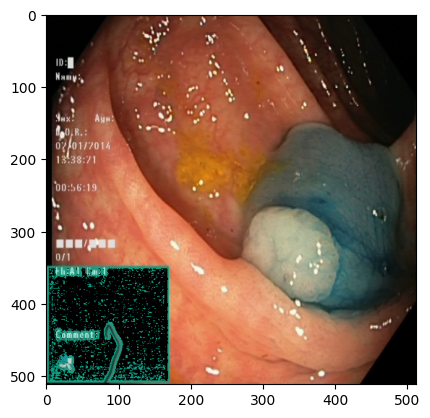

In [16]:
current_image = eliminate_green_patches_v2(images[0])

plt.imshow(current_image)

In [17]:
# Create a function to eliminate green patches from images if the image contain a green patche

def eliminate_green_patches_v2(image):

    new_image = image.copy()

    if detect_green_patches(image):
        mask_1 = np.zeros(image.shape, np.uint8)
        mask_2 = np.zeros(image.shape, np.uint8)
        mask_3 = np.zeros(image.shape, np.uint8)

        mask_1 = new_image[:, :, 1] > 160
        mask_2 = new_image[:, :, 2] > 130
        mask_3 = new_image[:, :, 0] < 60

        mask = mask_1 & mask_2 & mask_3

        return mask

    return new_image

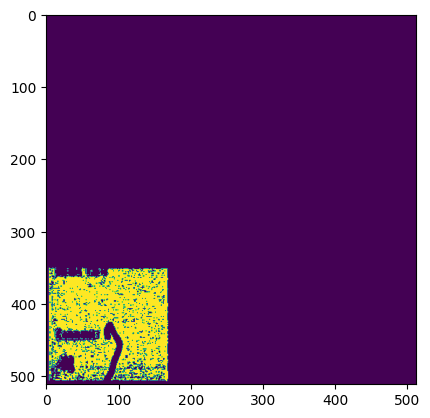

In [18]:
current_image = eliminate_green_patches_v2(images[0])

plt.imshow(current_image)